<a href="https://colab.research.google.com/github/pedmatheus7/Data-Science/blob/master/An%C3%A1lise_de_Dados_Airbnb_Praga_(Rep%C3%BAblica_Tcheca).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade do Estado do Pará - Centro de Ciências Naturais e Tecnologia

Curso de Graduação em Engenharia de Produção

Tecnologias e Sistemas de Informação / Profº: Paulo Lima

**AUTORES:**

**DEVISSON MESQUITA DOS SANTOS**

**FERNANDA LEANDRA LEAL LOPES**

**PEDRO MATHEUS D'OLIVEIRA**

**SYANNE DO SOCORRO LOBATO GONÇALVES**


# Análise de Dados Airbnb - *Praga - República Tcheca*

Praga é a capital da República Tcheca, tem cerca de 1,3 milhão de habitantes e é conhecida como "pérola das cem torres", pois para onde se olhar no horizonte avista-se uma torre e também de "mãe mágica das cidades" por causa da forte relação com astrólogos e alquimistas na sua construção.

É uma cidade muito rica em sua história e cultura com seus suntuosos monumentos históricos, construções de grande valor arquitetônico, belas paisagens, museus cheios de história, restaurantes que servem o melhor da gastronomia local e muito mais. **É de impressionar qualquer turista!!**

E por falar em turistas... Praga recebe cerca de sete milhões de turistas ao ano, é uma das dez cidades mais visitadas da Europa. Sendo o turismo a principal atividade econômica da cidade, o que se revela em centenas de hotéis e restaurantes.

A moeda usada na cidade é a coroa tcheca que, no momento em que este notebook fora criado, equivale a 25 centavos de real, o que torna a viagem para brasileiros mais acessível.

<center><img alt="Praga" width="90%" src="https://www.melhoresdestinos.com.br/wp-content/uploads/2019/08/passagens-aereas-praga-capa2019-01.jpg"></center>


O prefeito da cidade, Zdenek Hrib, com o intuito de criar estratégias para aumentar o número de visitantes da cidade contratou um consultor e analista de dados para verificar as preferências dos visitantes e fornecer um relatório com informações valiosas acerca do turismo na cidade.


# Airbnb
O consultor decidiu iniciar sua análise por dados fornecidos pela [Airbnb](https://www.airbnb.com.br/), pois a empresa já é considerada a maior empresa hoteleira da atualidade, com cerca 4 milhões de usuários oferecendo hospedagem, o Airbnb desde 2017 oferece mais opções de acomodação do que a soma das quatro maiores redes de hotéis do mundo.

<center><img alt="Airbnb" width="20%" src="https://logospng.org/download/airbnb/logo-airbnb-1536.png"></center>

Com isso, o consultor pretende analisar o preço das acomodações oferecidas pelo aplicativo, disponibilidade, número de reviews, a interferência de uma variável em outra, entre outros quesitos. E a partir disso, oferecer informações relevantes para a tomada de decisão do gestor a respeito do setor turístico da cidade.


# Extração dos Dados
Os dados foram extraídos por meio do portal *Inside Airbnb*.

Fonte: http://insideairbnb.com/get-the-data.html

In [ ]:
# Instalar a bibliota folium para criação de mapa interativo

In [ ]:
pip install folium

In [ ]:
# Importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Biblioteca para apresentação visual
import folium # Biblioteca para mapa interativo
from folium.plugins import MarkerCluster
import folium.plugins as plugins

# Configuração da biblioteca seaborn para os gráficos
sns.set(rc={'figure.figsize':(10, 6)}) # Tamanho da área de plotagem
sns.set_context("talk") # Fontes maiores na visualização

# Importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/czech-republic/prague/prague/2020-11-10/visualisations/listings.csv")

# Análise dos Dados
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

Antes de iniciar as análises, vamos verificar o formato do nosso *dataset*, analisando as 3 primeiras e as 3 últimas linhas.

In [ ]:
# Exibir na tela as 3 primeiras linhas do DataFrame
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,23163,"Quiet 1BR directly in the Centre, Air-conditio...",5282,Klara,NaN,Praha 1,50.08229,14.41552,Entire home/apt,3872,1,20,2020-08-22,0.16,42,0
1,23169,M302-Cozy Serviced Studio in Center,5282,Klara,NaN,Praha 1,50.08943,14.42373,Entire home/apt,2599,1,90,2020-06-29,0.92,42,0
2,26748,Apartment Great LETNA & Terrace,113902,Daniel+Bea,NaN,Praha 7,50.10011,14.42567,Entire home/apt,1857,3,357,2020-09-29,2.89,3,359


In [ ]:
# Exibir na tela as 3 últimas linhas do DataFrame
df.tail(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
8040,46328858,Greg Apartments Kampa VI,22325529,Michal,NaN,Praha 5,50.08066,14.40488,Private room,1322,2,0,NaN,NaN,9,359
8041,46329043,Soukromý dvojlůžkový pokoj s kuchyní a koupelnou,313760165,Denisa,NaN,Praha 4,50.06393,14.42876,Entire home/apt,400,1,0,NaN,NaN,1,365
8042,46335267,"Comfortable 1-Bedroom Apartment, Prague 6, Subway",59629547,Petr,NaN,Praha 6,50.09817,14.40183,Entire home/apt,1326,4,0,NaN,NaN,48,0


A partir dessa breve análise nota-se que a variável `neighbourhood_group` está sem dados tanto no início quanto no final do Dataframe. Já as variáveis `last_review` e `reviews_per_month` estão vazias nas últimas linhas o que indica que essas três variáveis citadas não estão com os dados completos.

## **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# Identificar o volume de dados do DataFrame
print("Linhas:\t {}".format(df.shape[0]))
print("Colunas:\t {}\n".format(df.shape[1]))
# Apresentar na tela o nome das variáveis e os tipos de dados contidos no DataFrame
display(df.dtypes)

Linhas:	 8043
Colunas:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Há 8043 linhas e 16 colunas. As variáveis são do tipo `int, object e float`.


## **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# Ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False).round(2)

neighbourhood_group               100.00
reviews_per_month                  14.51
last_review                        14.51
name                                0.04
availability_365                    0.00
calculated_host_listings_count      0.00
number_of_reviews                   0.00
minimum_nights                      0.00
price                               0.00
room_type                           0.00
longitude                           0.00
latitude                            0.00
neighbourhood                       0.00
host_name                           0.00
host_id                             0.00
id                                  0.00
dtype: float64

Com essa outra breve análise, observa-se que a coluna `neighbourhood_group` não possui nenhuma relevância para a análise dos dados, já que ela está 100% vazia em todas as linhas do DataFrame.

##Dicionário de Dados
Por meio das análises anteriores é possível indicar o que representa cada variável do DataFrame:
* `availability_365` - número de dias de disponibilidade dentro de 365 dias;
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião;
* `host_id` - número de id do proprietário (anfitrião) da propriedade;
* `host_name` - Nome do anfitrião;
* `id` - número de id gerado para identificar o imóvel;
* `last_review` - data do último review;
* `latitude` - coordenada da latitude da propriedade;
* `longitude` - coordenada da longitude da propriedade;
* `minimum_nights` - quantidade mínima de noites para reservar;
* `name` - nome da propriedade anunciada;
* `neighbourhood_group` - esta coluna não contém nenhum valor válido;
* `neighbourhood` - nome do bairro;
* `number_of_reviews` - número de reviews que a propriedade possui;
* `price` - preço para alugar o imóvel;
* `reviews_per_month` - quantidade de reviews por mês;
* `room_type` - informa o tipo de quarto que é oferecido.



###Excluindo colunas com dados faltantes

In [ ]:
# Excluindo as colunas com dados faltantes e dados que não serão utilizados
df.drop(columns=['neighbourhood_group','reviews_per_month','last_review','id','host_id'], inplace=True)

In [ ]:
# Verificando novamente o dataset
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False).round(2)

name                              0.04
availability_365                  0.00
calculated_host_listings_count    0.00
number_of_reviews                 0.00
minimum_nights                    0.00
price                             0.00
room_type                         0.00
longitude                         0.00
latitude                          0.00
neighbourhood                     0.00
host_name                         0.00
dtype: float64

Desse modo, verifica-se que as colunas `neighbourhood_group`, `reviews_per_month`, `last_review` foram excluídas. 

A coluna `neighbourhood_group` foi excluída, pois não contém nenhum dado, portanto, não há o que ser analisado nesta coluna, já as colunas `reviews_per_month` e `last_review` foram excluídas, pois se referem a avaliações dadas pelas pessoas que se hospedaram e estas informações não serão analisadas neste notebook.
As colunas `id` e `host_id` foram excluídas, visto que a única funcionalidade destas colunas são de identificação.


## **Q3. Como estão distribuídas as colunas numéricas do dataset?** 

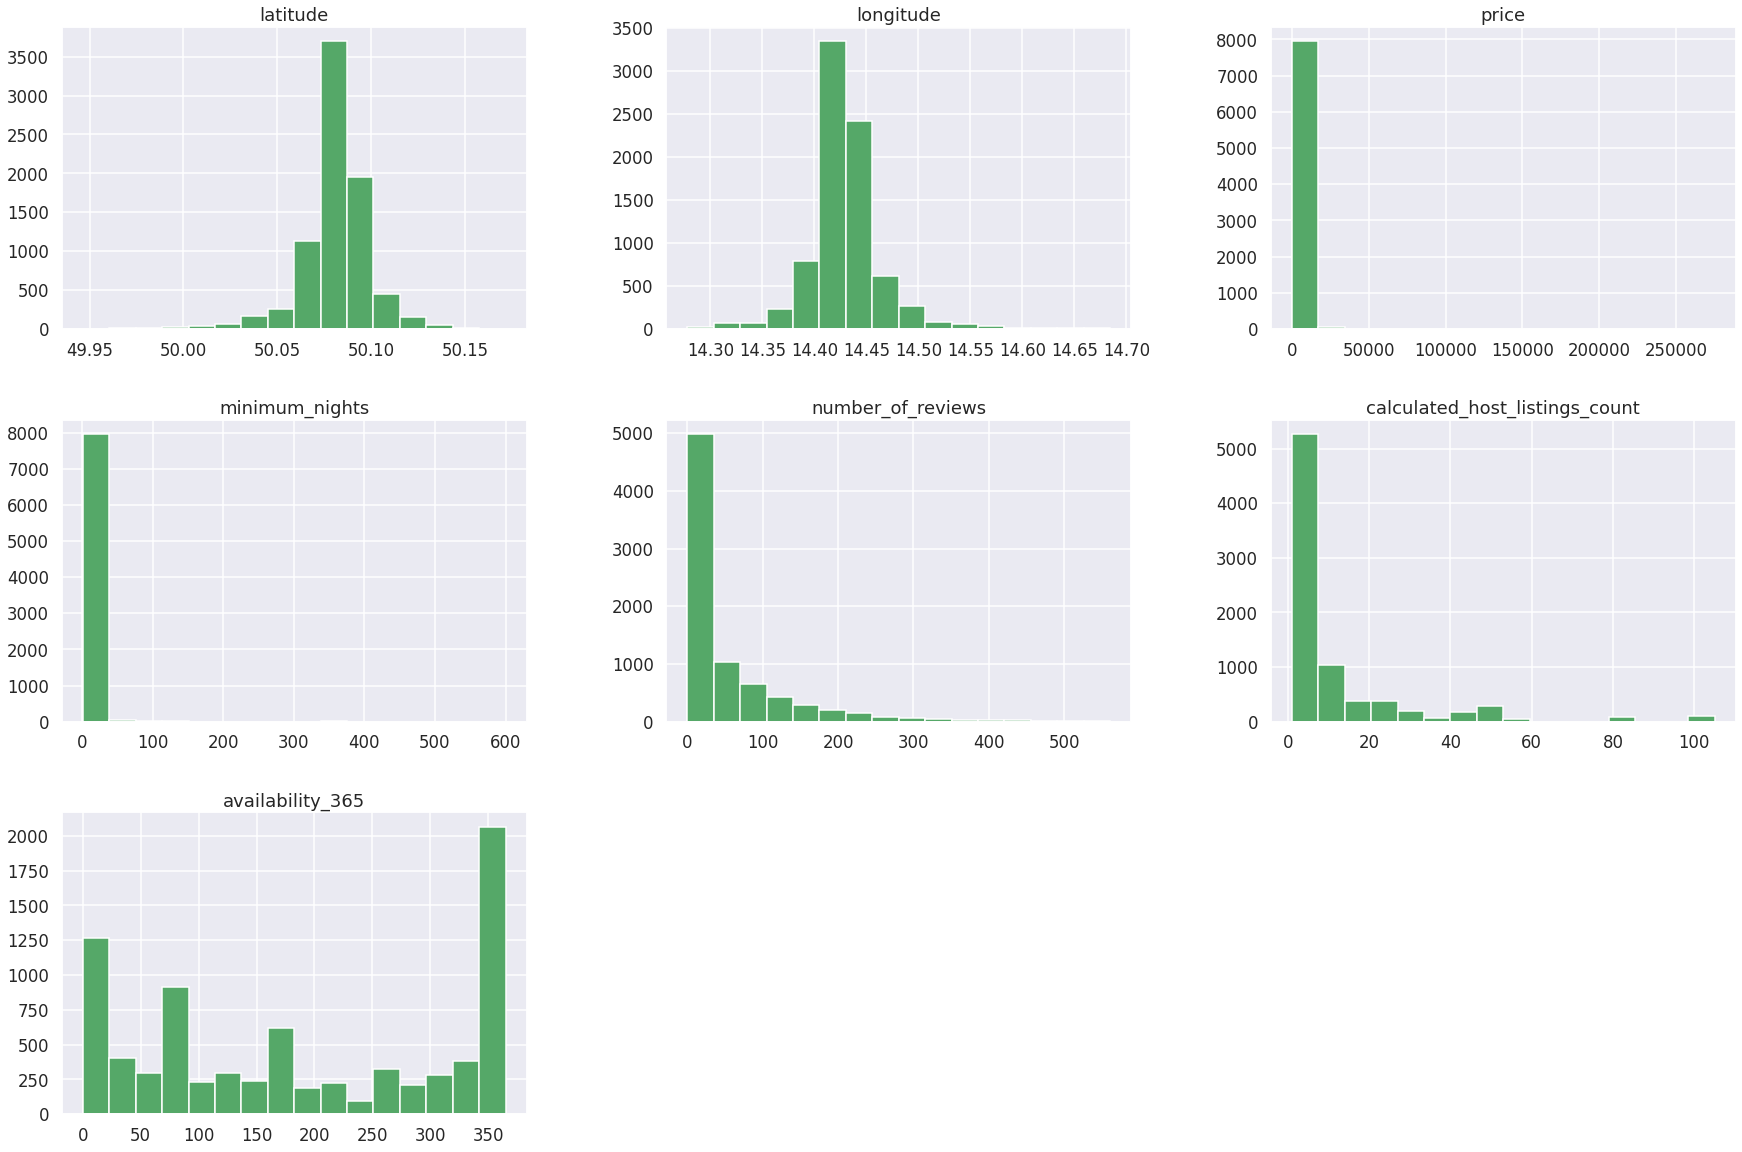

In [ ]:
# Plotar o histograma das colunas numéricas
df.hist(bins=16, figsize=(30,20), color='g');

A imagem abaixo apresenta as variáveis que possuem indicativo de que há outliers.

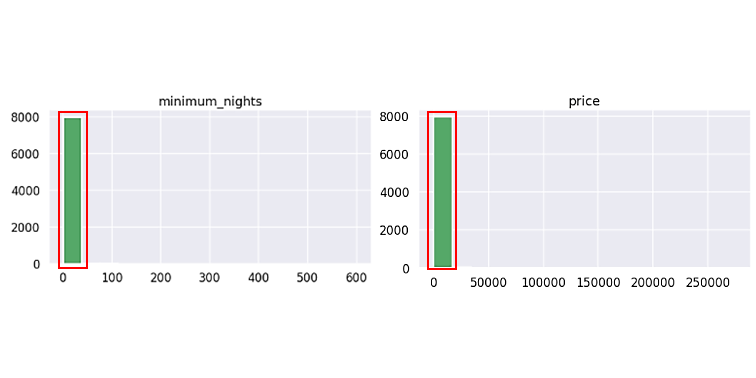

## **Q4. Qual o resumo estatístico das colunas numéricas?**

In [ ]:
# ver o resumo estatístico das colunas numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].describe().round(2)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,8043.00,8043.00,8043.00,8043.00,8043.00
mean,2670.06,3.45,52.74,11.23,190.53
std,10751.55,16.07,79.53,18.23,135.74
min,0.00,1.00,0.00,1.00,0.00
25%,837.50,1.00,2.00,1.00,69.00
50%,1290.00,2.00,18.00,4.00,179.00
75%,2122.00,2.00,71.00,11.00,344.00
max,275000.00,600.00,561.00,105.00,365.00


A partir do resumo estatístico anterior, é possível fazer algumas observações:

Em relação à coluna `price`:

* A média da diária (`mean`) em Praga é de 2.670 coroas tchecas, com desvio padrão (`std`) de 10.751, portanto é um desvio padrão alto;

* O valor mínimo da diária é igual a 0;

* O valor máximo da diária é de 275.000 coroas tchecas;

* Dataset informa que 75% dos valores da coluna possuem valores abaixo de 2.122 coroas tchecas; 50% dos valores (mediana) da coluna estão abaixo de 1.290 coroas tchecas e 25% dos valores da coluna estão abaixo de 837 coroas tchecas;

Em relação à coluna `minimum_nights`:

* A coluna minimum_nights mostra uma valor máximo de 600 noites;
* Dataset indica que 75% das pessoas ficam por até 2 noites; a mediana é de 2 noites e a média é de 3,4 noites.

## **Q5. Existem outliers nas colunas numéricas?**

### Analisando a distribuição dos valores da coluna minimum_nights (Boxplot)?

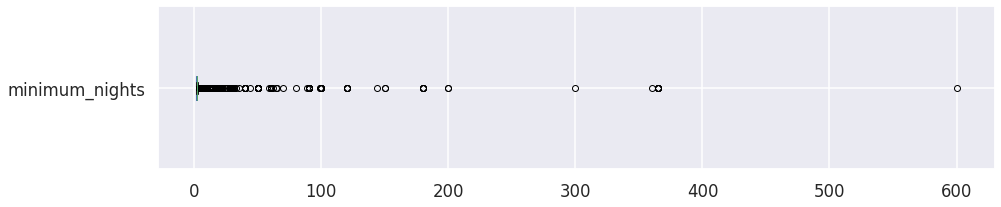

minimum_nights acima de 4 dias: 
468 entradas
5.8187%


In [ ]:
# utilizando o método Boxplot para análise de minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# quantidade de valores acima de 4 dias para minimum_nights
print("minimum_nights acima de 4 dias: ")
print("{} entradas".format(len(df[df.minimum_nights > 4])))
print("{:.4f}%".format((len(df[df.minimum_nights > 4]) / df.shape[0])*100))

### Analisando a distribuição dos valores da coluna price (Boxplot)?

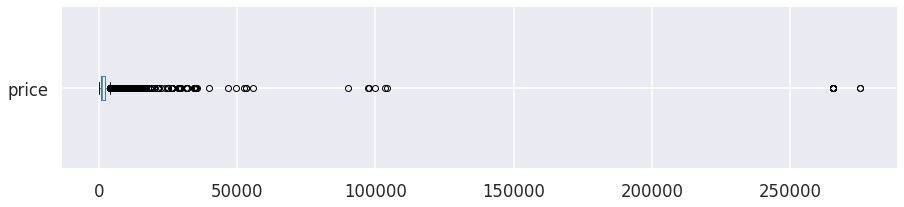


price: valores acima de $ 3.000,00
1197 entradas: 
14.8825%


In [ ]:
# utilizando o método boxplot para a variável price
df.price.plot(kind='box', vert= False, figsize=(15,3),)
plt.show()

# ver quantidade de valores acima de 3.000 para price
print("\nprice: valores acima de $ 3.000,00")
print("{} entradas: ".format(len(df[df.price > 3000])))
print("{:.4f}%".format((len(df[df.price > 3000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

### Eliminando os *Outliers*

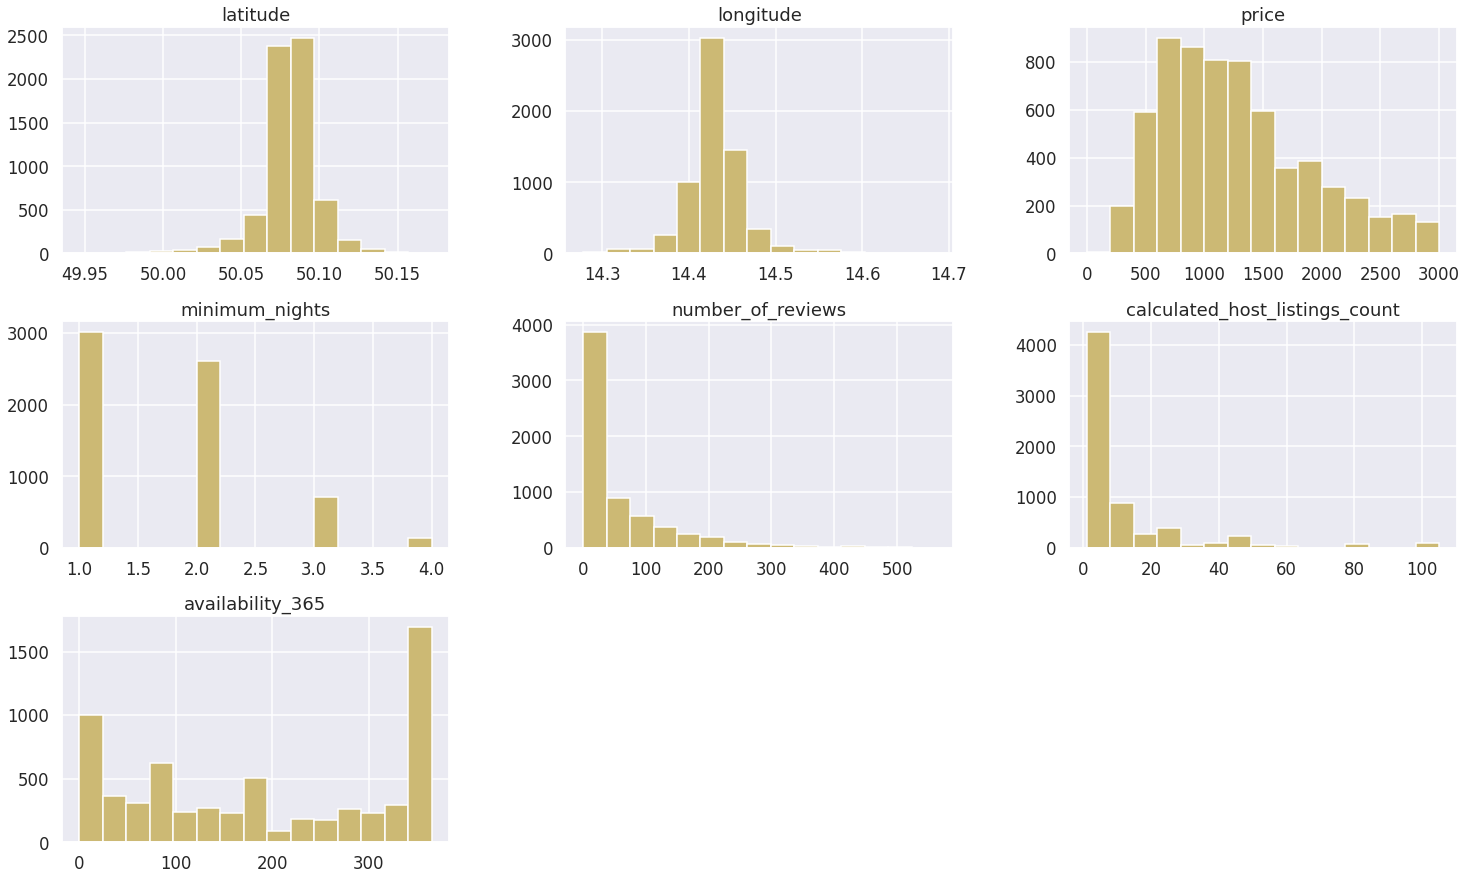

In [ ]:
# Optou-se por eliminar preços maiores que $ 3.000 e
# número de noites superiores a 4
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 3000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 4].index, axis=0, inplace=True)

# plota o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(25,15), color='y');

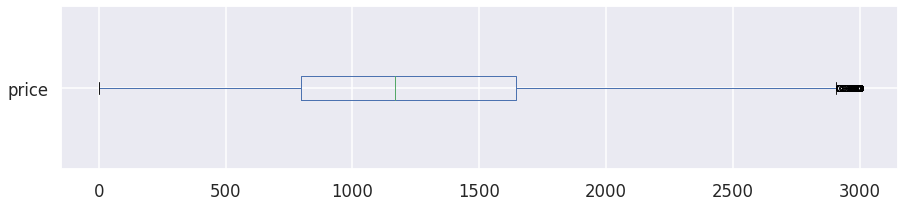

In [ ]:
# utilizando o método boxplot para a variável price
df_clean.price.plot(kind='box', vert= False, figsize=(15,3),)
plt.show()


In [ ]:
# ver o resumo estatístico das colunas numéricas após a eliminação dos outliers
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].describe().round(2)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,6469.00,6469.00,6469.00,6469.00,6469.00
mean,1272.83,1.68,57.74,11.23,191.22
std,632.63,0.75,82.78,18.42,134.89
min,0.00,1.00,0.00,1.00,0.00
25%,796.00,1.00,3.00,1.00,70.00
50%,1167.00,2.00,22.00,4.00,179.00
75%,1644.00,2.00,80.00,11.00,344.00
max,3000.00,4.00,561.00,105.00,365.00


O resumo estatístico foi refeito para efeito de comparação com o resumo estatístico antes da eliminação dos outliers.

## **Q6. Qual a correlação existente entre as colunas?**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews',
                 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.064576,-0.113015,0.039018,0.046706
minimum_nights,0.064576,1.000000,0.050927,-0.017632,-0.068529
number_of_reviews,-0.113015,0.050927,1.000000,0.056865,-0.012899
calculated_host_listings_count,0.039018,-0.017632,0.056865,1.000000,0.053451
availability_365,0.046706,-0.068529,-0.012899,0.053451,1.000000


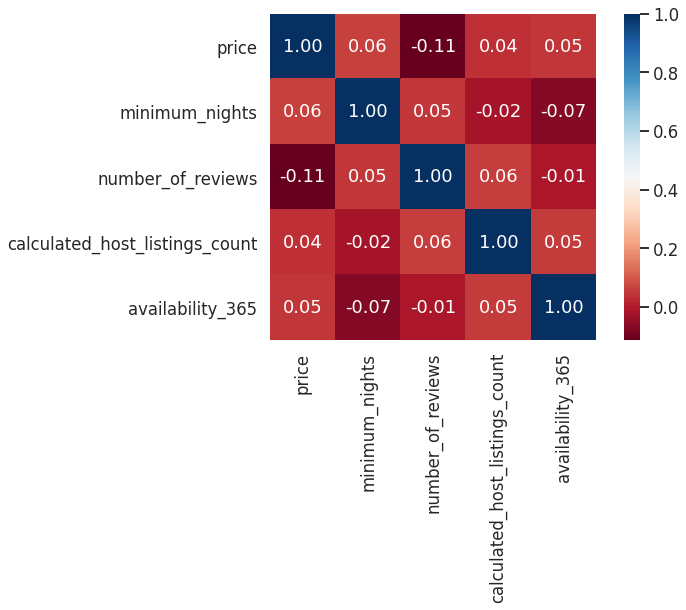

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Em uma correlação positiva entre variáveis temos que quando o valor de uma variável aumenta o da outra também aumenta, de mesmo modo quando o valor da variável diminui. Para os hotéis de Praga, temos este tipo de correlação entre as variáveis:

**1. Preço <-> Quantidade mínima de noites para reservar**

**2. Preço <-> Quantidade de imóveis do mesmo anfitrião**

**3. Preço <-> Número de dias de disponibilidade dentro de 365 dias**

**4. Quantidade mínima de noites para reservar <-> Número de reviews que a propriedade possui**

**5. Número de reviews que a propriedade possui <-> Quantidade de imóveis do mesmo anfitrião**

**6. Quantidade de imóveis do mesmo anfitrião <-> Número de dias de disponibilidade dentro de 365 dias**

Entretanto, todas as correlações positivas são fracas, pois apresentam Força da relação no intervalo **0,0 < r < 0,3**, portanto as variáveis apresentadas não são dependentes entre si.

Já em uma correlação negativa temos que quando o valor de uma variável aumenta o da outra diminui e vice-versa. Para os hóteis de Praga, temos este tipo de correlaçao entre as variáveis:

**1. Preço <-> Número de reviews que a propriedade possui**

**2. Quantidade mínima de noites para reservar <-> quantidade de imóveis do mesmo anfitrião**

**3. Quantidade mínima de noites para reservar <-> Número de dias de disponibilidade dentro de 365 dias**

**4. Número de reviews que a propriedade possui <-> Número de dias de disponibilidade dentro de 365 dias**

De mesmo modo que as correlações positivas, as correlações negativas entre as variáveis são fracas.


## **Q7. Qual o tipo de imóvel mais alugado?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    4967
Private room       1126
Hotel room          263
Shared room         113
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.767816
Private room       0.174061
Hotel room         0.040655
Shared room        0.017468
Name: room_type, dtype: float64

## **Q8. Qual a localidade mais cara na cidade de Praga?**

In [ ]:
# ver preços por bairros (neighbourhood), na média (maiores preços)
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].round(2)

neighbourhood
Dolní Počernice    1992.00
Libuš              1626.00
Velká Chuchle      1550.89
Královice          1500.00
Praha 1            1443.99
Čakovice           1409.00
Praha 15           1378.86
Petrovice          1344.12
Praha 11           1323.52
Praha 5            1282.52
Name: price, dtype: float64

## **Q9. Como estão distribuídos geograficamente os imóveis, em função do preço na cidade de Praga?**


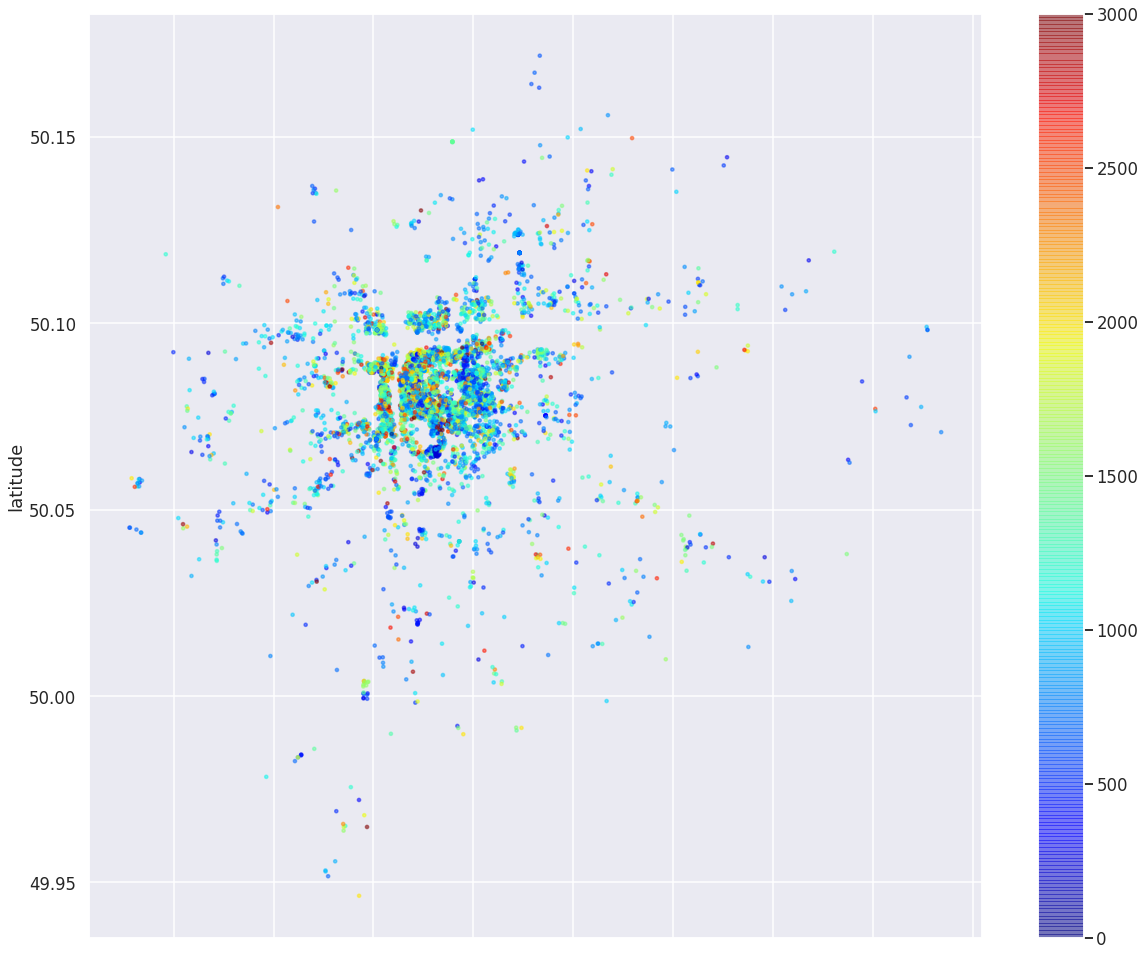

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.5, c=df_clean['price'], s=10,
              cmap=plt.get_cmap('jet'), figsize=(20,17));

In [ ]:
# Criar uma lista com as coordenadas dos locais contidos no DataFrame
coordenadas=[]
for lat,lng in zip(df_clean.latitude.values[:8043],df.longitude.values[:8043]):
  coordenadas.append([lat,lng])

In [ ]:
# Criar um mapa de temperatura para visualizar distribuição dos locais na cidade de Praga
mapa = folium.Map(location=[50.0761096,14.4677555])
mapa.add_child(plugins.HeatMap(coordenadas))
mapa

Por meio do mapa observa-se que os locais para alugar estão mais concentrados no centro da cidade.

## Q10. Qual tipo de imóvel é mais barato? Qual localidade da cidade é mais barata?

In [ ]:
# Ver preços por tipo de imóvel (room_type), na média (menores preços)
df_clean.groupby(['room_type']).price.mean().sort_values(ascending=True)[:4].round(2)

room_type
Shared room         467.46
Private room        956.99
Entire home/apt    1350.74
Hotel room         1499.58
Name: price, dtype: float64

Apesar dos quartos compartilhados serem mais baratos, as casas/apartamentos para alugar são os mais procurados em Praga, o que sugere que as pessoas preferem pagar mais caro para ter maior privacidade.

In [ ]:
# Ver preços por bairros (neighbourhood), na média (menores preços)
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[:5].round(2)

neighbourhood
Vinoř         424.00
Koloděje      519.50
Březiněves    619.25
Lysolaje      631.00
Praha 22      734.10
Name: price, dtype: float64

Por meio da análise do mapa, foi possível observar que os bairros mais baratos estão mais distantes do centro de Praga.

# Considerações Finais

Por meio da análise de dados feita acima, o analista ponderou as seguintes recomendações para a tomada de decisão do gestor:

* Os locais para alugar estão em grande maioria no centro da cidade de Praga, com média de 1272,83 Coroas Tchecas por imóvel alugado e aproximadamente 2 noites de reserva mínima;

* Os bairros mais baratos estão distantes do centro de Praga. Recomenda-se um estudo mais detalhado sobre possíveis novos hosts, assim como o tipo de imóvel passível à ser utilizado na plataforma;

* A maioria dos imóveis são do tipo Apartamento/Casa Inteira e Quarto Privado (80%);

* Não foram encontradas correlações fortes entre as variáveis estudadas.

Este Notebook, serve como uma análise inicial exploratória dos dados

* Foram elimininados alguns *outliers* da amostra para a realização de algumas observações;

* Detectou-se alguns *outliers* existentes em algumas colunas (preço e noites mínimas);

* Foram excluídas algumas colunas que não serviram para a análise de dados.